In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# read raw data
raw_data = pd.read_csv("fetal_health_classification/fetal_health.csv")

In [3]:
# show data info, head
raw_data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
raw_data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
# show null value
raw_data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

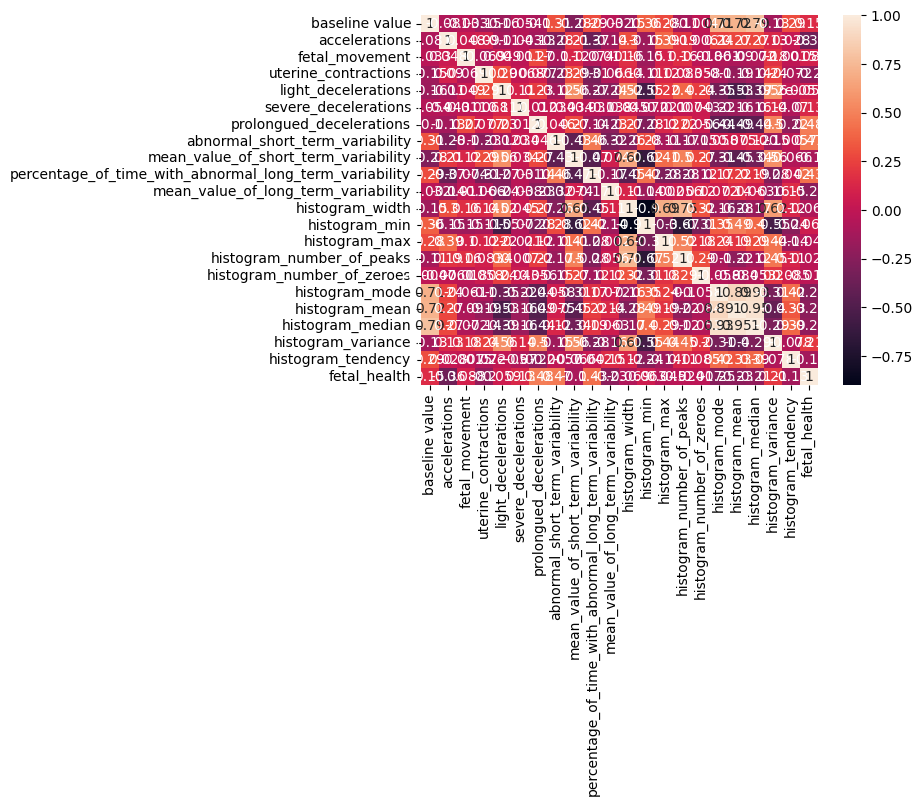

In [7]:
# correlation graph
sns.heatmap(raw_data.corr(), annot=True)
plt.show()

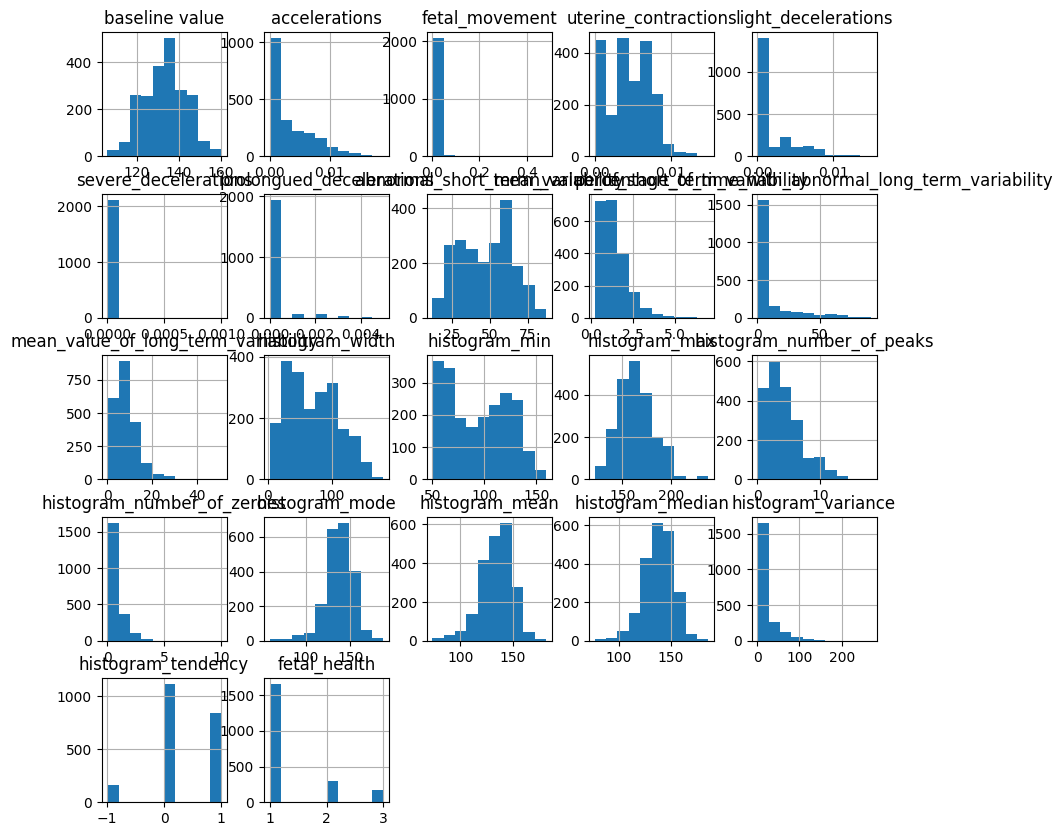

In [9]:
# hist plot
raw_data.hist(figsize=(10,10))
plt.show()

In [41]:
# process data (unusable values dropped)
proc_data = raw_data.iloc[:, 0:10]


In [42]:
# concat process
y_value = raw_data.fetal_health
proc_data.insert(10, "fetal_health", y_value)

In [43]:
proc_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,2.0


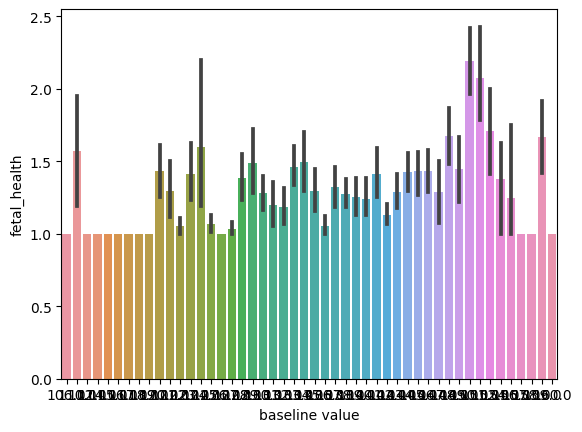

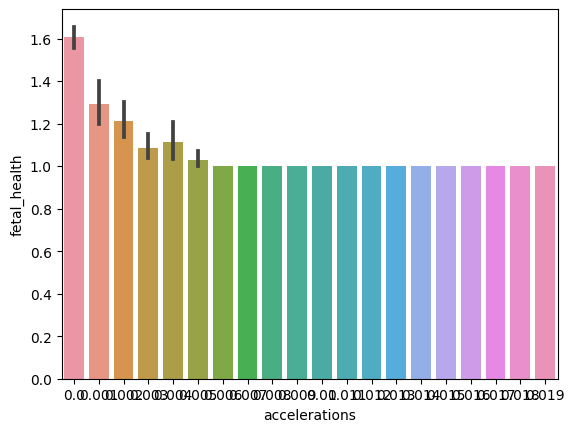

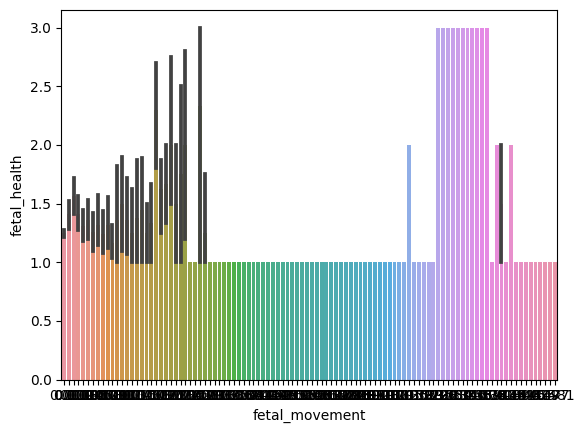

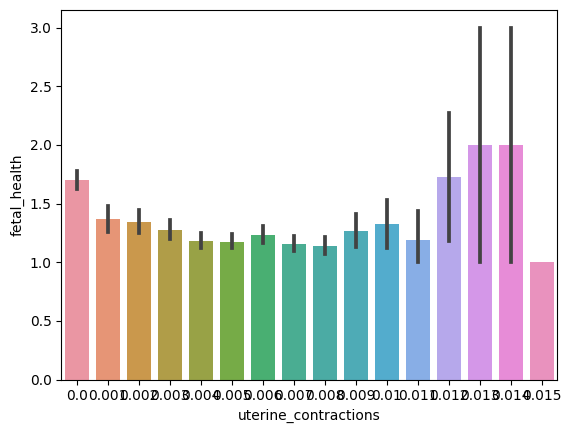

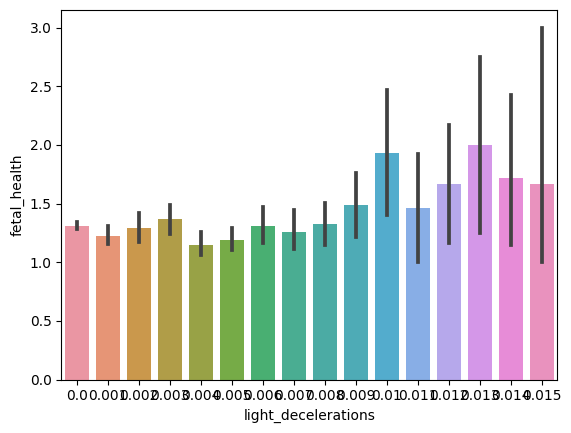

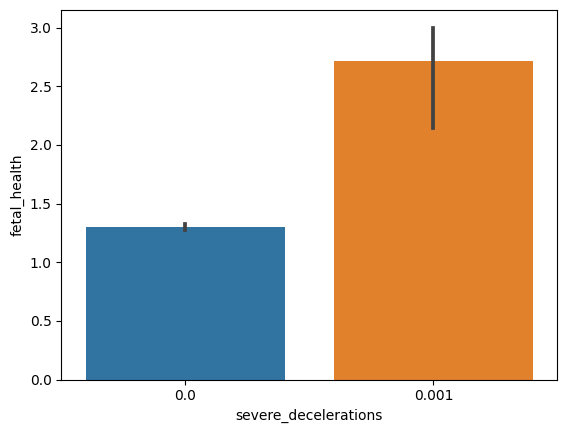

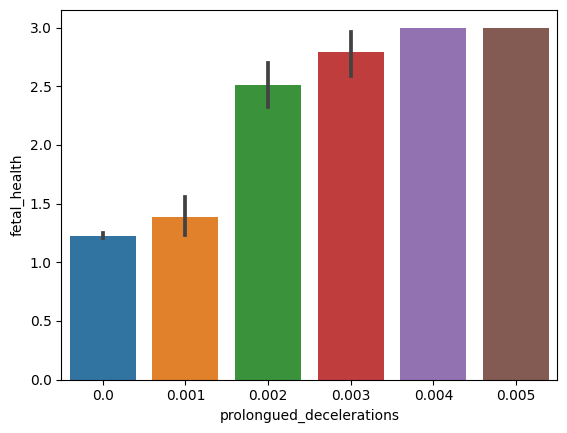

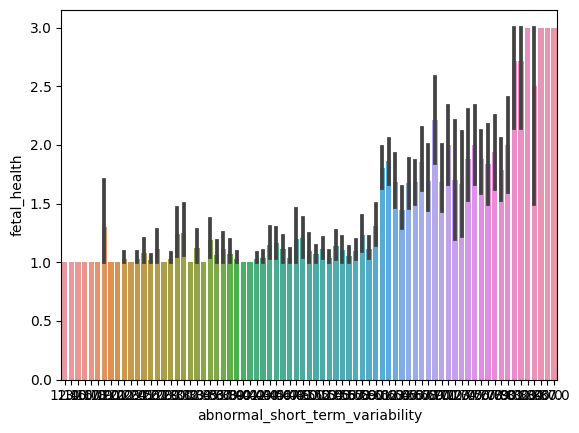

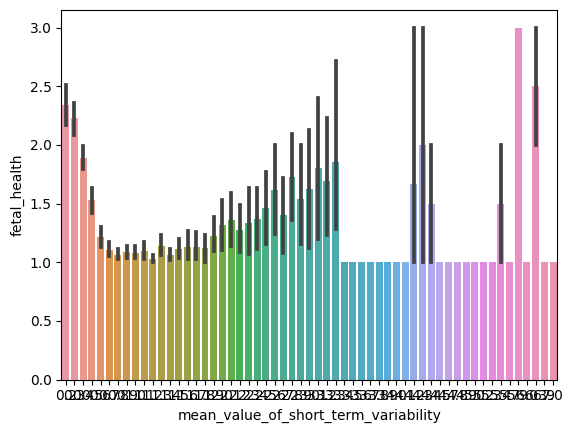

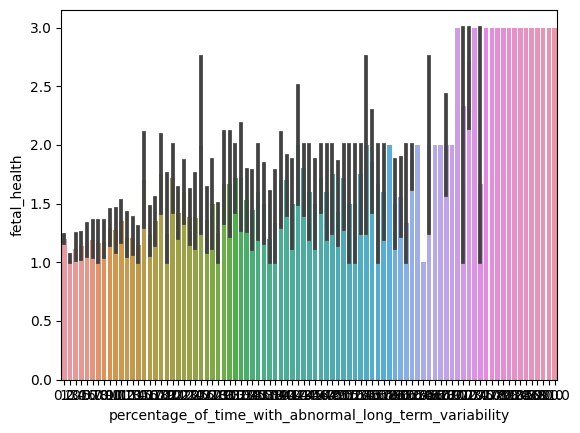

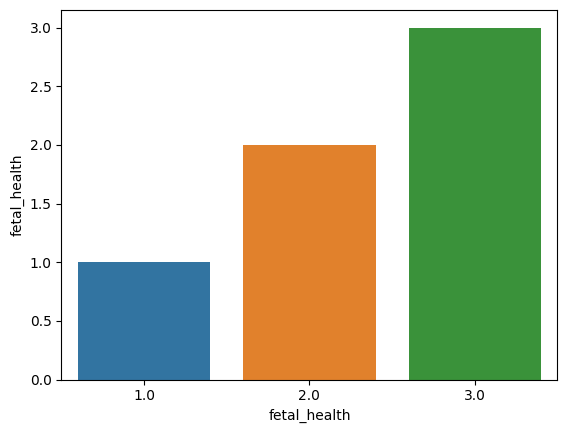

In [44]:
for i in proc_data.describe().columns:
    sns.barplot(x=eval(f"proc_data['{i}']"), y=proc_data["fetal_health"])
    plt.show()
    

In [45]:
proc_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,2.0


In [46]:
# input output split
# we have no categorical values
y = proc_data.pop("fetal_health")
X = proc_data

In [47]:
y.shape, X.shape

((2126,), (2126, 10))

In [48]:
# minmaxscaler
scaler = MinMaxScaler()
cols = X.columns
X[cols] = scaler.fit_transform(X[cols])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4212\349991462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols] = scaler.fit_transform(X[cols])


In [49]:
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability
0,0.259259,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.813333,0.044118,0.472527
1,0.481481,0.315789,0.000000,0.400000,0.2,0.0,0.0,0.066667,0.279412,0.000000
2,0.500000,0.157895,0.000000,0.533333,0.2,0.0,0.0,0.053333,0.279412,0.000000
3,0.518519,0.157895,0.000000,0.533333,0.2,0.0,0.0,0.053333,0.323529,0.000000
4,0.481481,0.368421,0.000000,0.533333,0.0,0.0,0.0,0.053333,0.323529,0.000000
...,...,...,...,...,...,...,...,...,...,...
2121,0.629630,0.000000,0.000000,0.466667,0.0,0.0,0.0,0.893333,0.000000,0.274725
2122,0.629630,0.052632,0.000000,0.466667,0.0,0.0,0.0,0.880000,0.029412,0.241758
2123,0.629630,0.052632,0.000000,0.466667,0.0,0.0,0.0,0.893333,0.029412,0.219780
2124,0.629630,0.052632,0.000000,0.400000,0.0,0.0,0.0,0.880000,0.029412,0.296703


In [84]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [85]:
X_train.shape, X_test.shape

((1700, 10), (426, 10))

In [86]:
y_train.shape, y_test.shape

((1700,), (426,))

In [87]:
# we can use this processed data 
# knn classifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
# report
report = classification_report(y_test, prediction)

print(report)


              precision    recall  f1-score   support

         1.0       0.94      0.98      0.95       326
         2.0       0.76      0.60      0.67        58
         3.0       0.88      0.83      0.85        42

    accuracy                           0.91       426
   macro avg       0.86      0.80      0.83       426
weighted avg       0.91      0.91      0.91       426



In [88]:
# control the rates of fetal healt
y.value_counts("1")

# null prediction is %77 


1.0    0.778457
2.0    0.138758
3.0    0.082785
Name: fetal_health, dtype: float64

In [89]:
# naive bayes
naive = GaussianNB()
naive.fit(X_train, y_train)

prediction_2 = naive.predict(X_test)

report_2 = classification_report(y_test, prediction_2)

print(report_2)

              precision    recall  f1-score   support

         1.0       0.98      0.68      0.80       326
         2.0       0.32      0.91      0.47        58
         3.0       0.65      0.52      0.58        42

    accuracy                           0.69       426
   macro avg       0.65      0.71      0.62       426
weighted avg       0.86      0.69      0.74       426



In [90]:
# logistic regression
log_reg = LogisticRegression(solver="liblinear", random_state=0)
log_reg.fit(X_train, y_train)

prediction_3 = log_reg.predict(X_test)

report_3 = classification_report(y_test, prediction_3)

print(report_3)

              precision    recall  f1-score   support

         1.0       0.89      0.98      0.93       326
         2.0       0.63      0.47      0.53        58
         3.0       0.92      0.55      0.69        42

    accuracy                           0.86       426
   macro avg       0.81      0.66      0.72       426
weighted avg       0.86      0.86      0.85       426



In [101]:
# SVM
svm = SVC(C=10, gamma=0.4, kernel="rbf", probability=True)
svm.fit(X_train, y_train)
prediction_4 = svm.predict(X_test)

# report
report_4 = classification_report(y_test, prediction_4)

print(report_4)

              precision    recall  f1-score   support

         1.0       0.92      0.95      0.94       326
         2.0       0.63      0.62      0.63        58
         3.0       0.94      0.74      0.83        42

    accuracy                           0.88       426
   macro avg       0.83      0.77      0.80       426
weighted avg       0.88      0.88      0.88       426



knn roc auc_score :95.46
 naive bayes roc_auc score :87.41
log_reg roc_auc_score :93.51
svm roc auc score :96.01


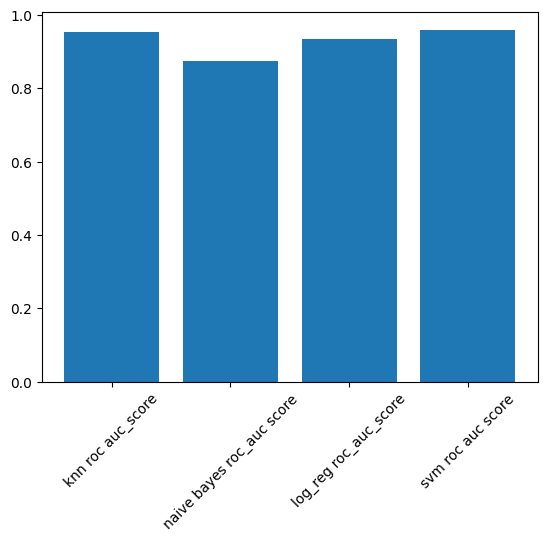

In [109]:
# compare all roc aucscores
y_pred_proba = knn.predict_proba(X_test)
knn_roc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")

y_pred_proba = naive.predict_proba(X_test)
naive_roc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")

y_pred_proba = log_reg.predict_proba(X_test)
log_reg_roc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")

y_pred_proba = svm.predict_proba(X_test)
svm_roc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")

print(f"knn roc auc_score :{knn_roc*100 :.2f}\n naive bayes roc_auc score :{naive_roc*100 :.2f}\nlog_reg roc_auc_score :{log_reg_roc*100 :.2f}\nsvm roc auc score :{svm_roc*100 :.2f}")
        
plt.bar(["knn roc auc_score", "naive bayes roc_auc score", "log_reg roc_auc_score", "svm roc auc score"], [knn_roc, naive_roc, log_reg_roc, svm_roc])
plt.xticks(rotation=90)
plt.show()
        



In [ ]:
# if you want to use grid search or randomized you can use but accuracy rate is enough for me :)...